In [4]:
from pedigree_functions import *
import tskit
import msprime
import stdpopsim
import networkx as nx
import matplotlib.pyplot as plt
import io
from IPython.display import display as SVG
import sys
import tszip
import pandas as pd
import numpy as np

In [5]:
#generate pedigrees for breeding scheme

#bulk selection
def bulk_method(n = 10, selfing_genos = 2, random_mating_genos = 2, rm_size_diff = 10, selection_step = [20, 5, 1]):
    df = pedigree_init(n)
    for i in range(0, selfing_genos):
        df = add_selfing(df)
    parent_size = len(df.loc[df['time'] == df['time'].min(), "id"])
    if (parent_size+rm_size_diff) < 0:
        raise ValueError('Random mating size difference eliminates all individuals!')
    df = add_random_mating(df, size_diff = rm_size_diff)
    for i in range(0, random_mating_genos - 1):
        #selection step or natural selection!
        df = add_random_mating(df)
    for i in range(0, len(selection_step)):
    #selection steps each!    
        parent_size = len(df.loc[df['time'] == df['time'].min(), "id"])
        if (parent_size-selection_step[i]) < 0:
            raise ValueError('Selection_step bigger than remaining individuals!')
        df = add_selfing(df, size_diff = -parent_size+selection_step[i])    
    return(df)


#single seed descent

#...

In [6]:
bulk_ped = bulk_method(n = 5, selfing_genos = 3, random_mating_genos = 2, rm_size_diff = 3, selection_step = [7, 5, 2])

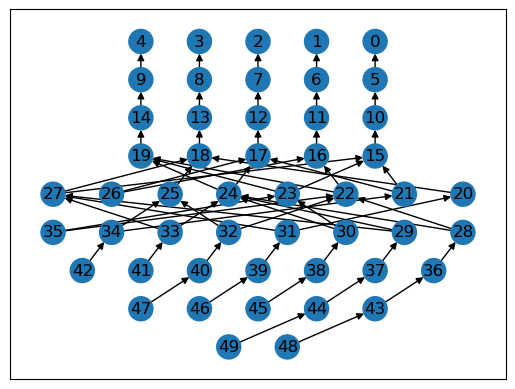

In [7]:
draw_pedigree(df_to_ts(bulk_ped).tree_sequence())

In [8]:
bulk_ts = df_to_ts(bulk_ped)

In [11]:
ped_ts = msprime.sim_ancestry(
    initial_state=bulk_ts, model="fixed_pedigree", random_seed=42, recombination_rate = 0.001)

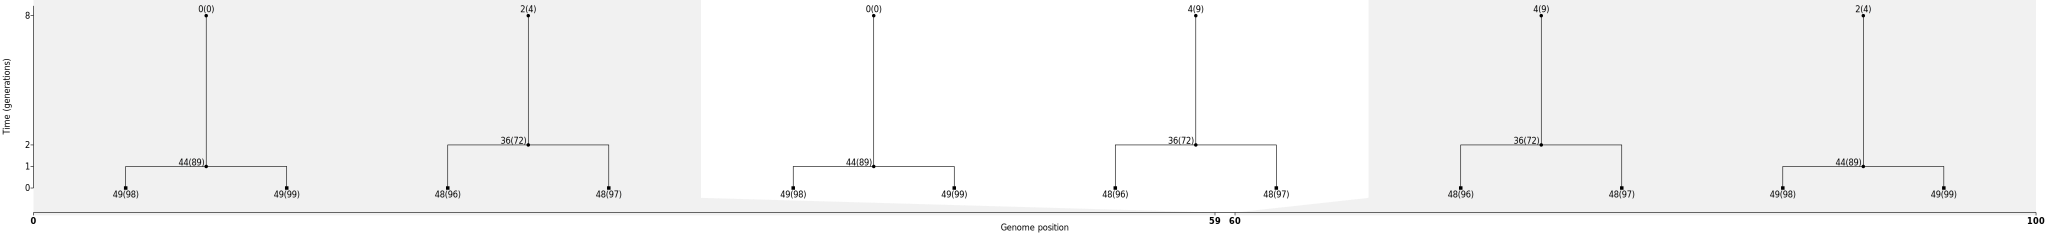

In [12]:
draw_ancestry(ped_ts)